<font color='red'><h1><center>FAKE NEWS CLASSIFICATION</center></h1></font>

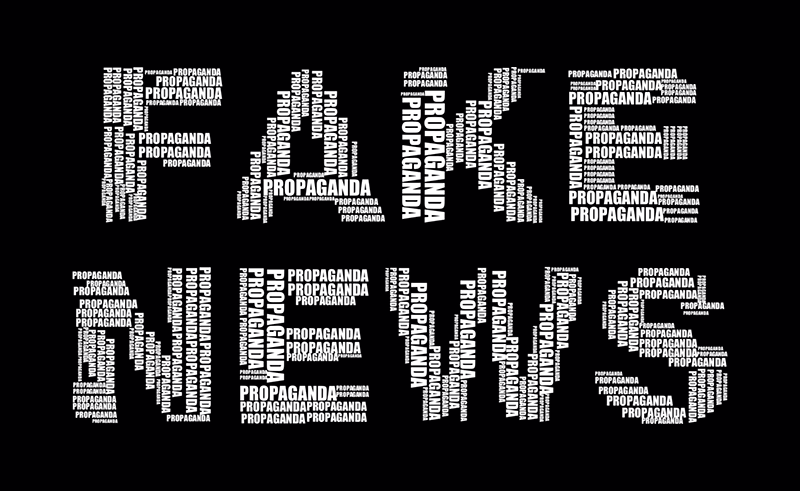

We are importing all the libraries that will be required for the model development

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

We load the data into a pandas DataFrame

In [2]:
data= pd.read_csv('Dataset/news.csv')

df= pd.DataFrame(data)
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


We are Seperating the X (dependent) and y(independent) variable fromt he data set to further processiing.
We will consider the **label** column as y varibale and **text** column as X variable. Rest of the columns are not considered important for the model development

In [3]:
X=df.text
X.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [4]:
y=df.label
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

We split the X and y data into **train** and **test**. Train dataset will be used for trainign the model and test dataset will be used to determine the accuracy of the model

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=7)

**TF**- the number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others.

**IDF**- words that occur many times a document, but also occur many times in many others, may be irrelevant. Inverse Document Frequency is a measure of how significant a term is in the entire document

We will initialize a TfidfVectorizer with stop words from the English language
 | maximum document frequency of 0.7 (terms with a higher document frequency will be ignored). We will then fit and transform train and test dataset

In [8]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

**Passive Aggressive Classifier**-  remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation. 

We will now initialize a PassiveAggressiveClassifier and fit tfidf_train and y_train in the model

In [9]:
pacl=PassiveAggressiveClassifier(max_iter=50)
pacl.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

We will predict on the **tfidf_test** set with the passiveaggresiveclassifier model and calculate the accuracy

In [10]:
y_pred=pacl.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


We will print out a confusion matrix to gain some insight on the number of false and true negatives and positives

In [12]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[589,  49],
       [ 41, 588]], dtype=int64)

We got an accuracy score of 92.9 % for the model